# The Basics: Training Your First Model

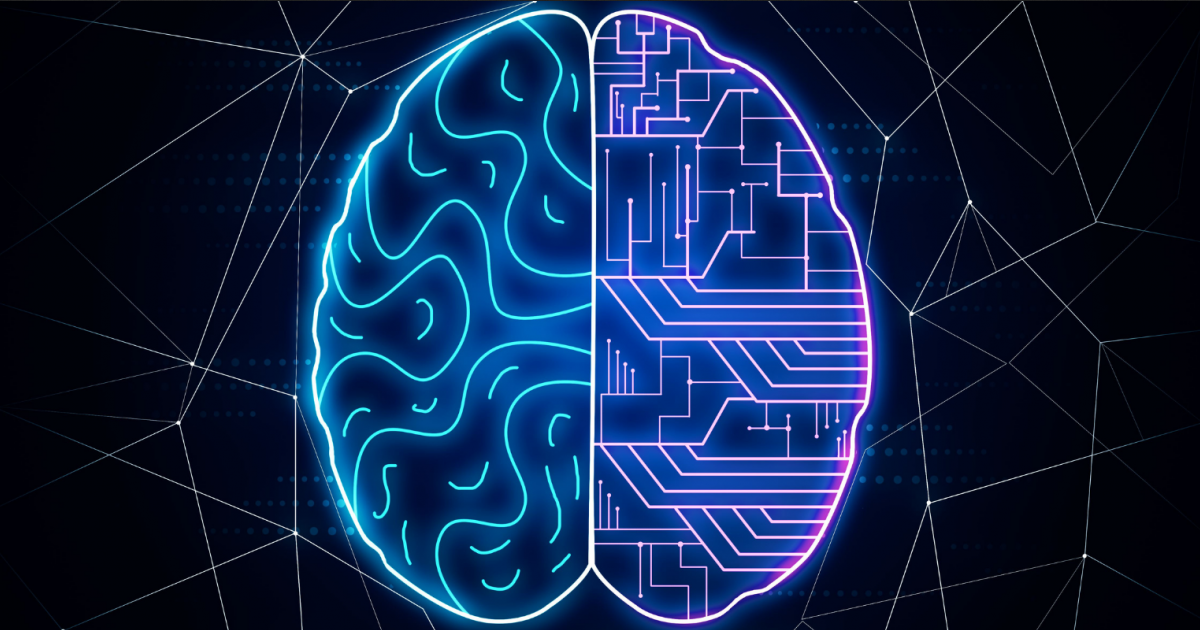

### `Machine learning algorithms`
  *are mathematical model mapping methods used to learn or uncover underlying patterns embedded in the data. Machine learning comprises a group of computational algorithms that can perform pattern recognition, classification, and prediction on data by learning from existing data (training set).*

#### `A MODEL MIRRORS A MATH FUNCTION`

[MORE INFO: Google’s machine learning crash course.](https://developers.google.com/machine-learning/crash-course/ml-intro)

We'll are going to introduce basic concepts and Later will cover more advanced problems.

The problem we will solve is to convert from Celsius to Fahrenheit, where the approximate formula is:

f=c×1.8+32

Of course, it would be simple enough to create a conventional Python function that directly performs this calculation, but that wouldn't be machine learning.

Instead, we will give TensorFlow some sample Celsius values (0, 8, 15, 22, 38) and their corresponding Fahrenheit values (32, 46, 59, 72, 100). Then, we will train a model that figures out the above formula through the training process.

In [2]:
import tensorflow as tf

In [3]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Set up training data

As we saw before, supervised Machine Learning is all about figuring out an algorithm given a set of inputs and outputs. Since the task in this Codelab is to create a model that can give the temperature in Fahrenheit when given the degrees in Celsius, we create two lists `celsius_q` and `fahrenheit_a` that we can use to train our model.

In [8]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


### Some Machine Learning terminology

 - **Feature** — The input(s) to our model. In this case, a single value — the degrees in Celsius.

 - **Labels** — The output our model predicts. In this case, a single value — the degrees in Fahrenheit.

 - **Example** — A pair of inputs/outputs used during training. In our case a pair of values from `celsius_q` and `fahrenheit_a` at a specific index, such as `(22,72)`.

## Create the model

Next, create the model. We will use the simplest possible model we can, a Dense network. Since the problem is straightforward, this network will require only a single layer, with a single neuron.

### Build a layer

We'll call the layer `l0` and create it by instantiating `tf.keras.layers.Dense` with the following configuration:

*   `input_shape=[1]` — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celsius.

*   `units=1` — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the `input_shape` of the next layer.)



In [10]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

### Assemble layers into the model

Once layers are defined, they need to be assembled into a model. The Sequential model definition takes a list of layers as an argument, specifying the calculation order from the input to the output.

This model has just a single layer, l0.

In [11]:
model = tf.keras.Sequential([l0])

**Note**

Sometimes you will often see the layers defined inside the model definition, rather than beforehand:

```python
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])
```

## Compile the model, with loss and optimizer functions

Before training, the model has to be compiled. When compiled for training, the model is given:

- **Loss function** — A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".)

- **Optimizer function** — A way of adjusting internal values in order to reduce the loss.


In [12]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

These are used during training (`model.fit()`, below) to first calculate the loss at each point, and then improve it. In fact, the act of calculating the current loss of a model and then improving it is precisely what training is.

During training, the optimizer function is used to calculate adjustments to the model's internal variables. The goal is to adjust the internal variables until the model (which is really a math function) mirrors the actual equation for converting Celsius to Fahrenheit.

TensorFlow uses numerical analysis to perform this tuning, and all this complexity is hidden from you so we will not go into the details here. What is useful to know about these parameters are:

The loss function ([mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error)) and the optimizer ([Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)) used here are standard for simple models like this one, but many others are available. It is not important to know how these specific functions work at this point.

One part of the Optimizer you may need to think about when building your own models is the learning rate (`0.1` in the code above). This is the step size taken when adjusting values in the model. If the value is too small, it will take too many iterations to train the model. Too large, and accuracy goes down. Finding a good value often involves some trial and error, but the range is usually within 0.001 (default), and 0.1

## Train the model

Train the model by calling the `fit` method.

During training, the model takes in Celsius values, performs a calculation using the current internal variables (called "weights") and outputs values which are meant to be the Fahrenheit equivalent. Since the weights are initially set randomly, the output will not be close to the correct value. The difference between the actual output and the desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted.

This cycle of calculate, compare, adjust is controlled by the `fit` method. The first argument is the inputs, the second argument is the desired outputs. The `epochs` argument specifies how many times this cycle should be run, and the `verbose` argument controls how much output the method produces.

In [13]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


later, we will go into more detail on what actually happens here and how a Dense layer actually works internally.

## Display training statistics

The `fit` method returns a history object. We can use this object to plot how the loss of our model goes down after each training epoch. A high loss means that the Fahrenheit degrees the model predicts is far from the corresponding value in `fahrenheit_a`.

We'll use [Matplotlib](https://matplotlib.org/) to visualize this (you could use another tool). As you can see, our model improves very quickly at first, and then has a steady, slow improvement until it is very near "perfect" towards the end.


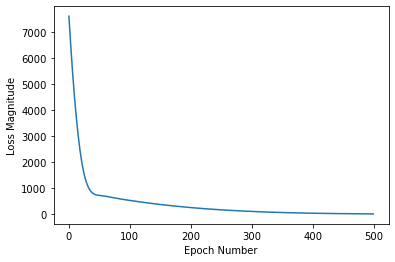

In [14]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

## Use the model to predict values

Now you have a model that has been trained to learn the relationship between `celsius_q` and `fahrenheit_a`. You can use the predict method to have it calculate the Fahrenheit degrees for a previously unknown Celsius degrees.

So, for example, if the Celsius value is 100, what do you think the Fahrenheit result will be? Take a guess before you run this code.

In [16]:
print(model.predict([100.0]))

[[211.28061]]


The correct answer is $100 \times 1.8 + 32 = 212$, so our model is doing really well.

### To review


*   We created a model with a Dense layer
*   We trained it with 3500 examples (7 pairs, over 500 epochs).

Our model tuned the variables (weights) in the Dense layer until it was able to return the correct Fahrenheit value for any Celsius value. (Remember, 100 Celsius was not part of our training data.)


## Looking at the layer weights

Finally, let's print the internal variables of the Dense layer. 

In [17]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.8284221]], dtype=float32), array([28.438404], dtype=float32)]


The first variable is close to ~1.8 and the second to ~32. These values (1.8 and 32) are the actual variables in the real conversion formula.

This is really close to the values in the conversion formula. We'll explain this in an upcoming video where we show how a Dense layer works, but for a single neuron with a single input and a single output, the internal math looks the same as [the equation for a line](https://en.wikipedia.org/wiki/Linear_equation#Slope%E2%80%93intercept_form), $y = mx + b$, which has the same form as the conversion equation, $f = 1.8c + 32$.

Since the form is the same, the variables should converge on the standard values of 1.8 and 32, which is exactly what happened.

With additional neurons, additional inputs, and additional outputs, the formula becomes much more complex, but the idea is the same.

### A little experiment

Just for fun, what if we created more Dense layers with different units, which therefore also has more variables?

In [18]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[211.7474]]
Model predicts that 100 degrees Celsius is: [[211.7474]] degrees Fahrenheit
These are the l0 variables: [array([[-0.897913  ,  0.56984806,  0.40519556,  0.50243104]],
      dtype=float32), array([-3.944702 ,  3.688088 , -1.6241357, -1.0007343], dtype=float32)]
These are the l1 variables: [array([[ 1.018987  , -0.30588368, -0.41609925,  0.9452605 ],
       [-0.7550549 ,  1.1266465 ,  0.4486696 , -1.375053  ],
       [ 0.05259911, -1.068037  , -0.89078933,  0.06973822],
       [ 0.30460125, -0.15091157, -0.90869725,  0.15725316]],
      dtype=float32), array([-3.1025324,  2.4366806,  3.7249823, -3.407566 ], dtype=float32)]
These are the l2 variables: [array([[-0.5408572 ],
       [ 0.44975838],
       [ 0.95558214],
       [-0.76126504]], dtype=float32), array([3.5677516], dtype=float32)]


As you can see, this model is also able to predict the corresponding Fahrenheit value really well. But when you look at the variables (weights) in the l0 and l1 layers, they are nothing even close to ~1.8 and ~32. The added complexity hides the "simple" form of the conversion equation.

Stay tuned for the next slide on how Dense layers work for the explanation.


# Recap

Congratulations! You just trained your first machine learning model. We saw that by training the model with input data and the corresponding output, the model learned to multiply the input by 1.8 and then add 32 to get the correct result.


![Screenshot%202022-05-23%20at%2014-33-11%20tensorflow-l2f1%20png%20%28PNG%20Image,%202876%20%C3%97%201618%20pixels%29%20%E2%80%94%20Scaled%20(47%25).png](attachment:Screenshot%202022-05-23%20at%2014-33-11%20tensorflow-l2f1%20png%20%28PNG%20Image,%202876%20%C3%97%201618%20pixels%29%20%E2%80%94%20Scaled%20(47%25).png)
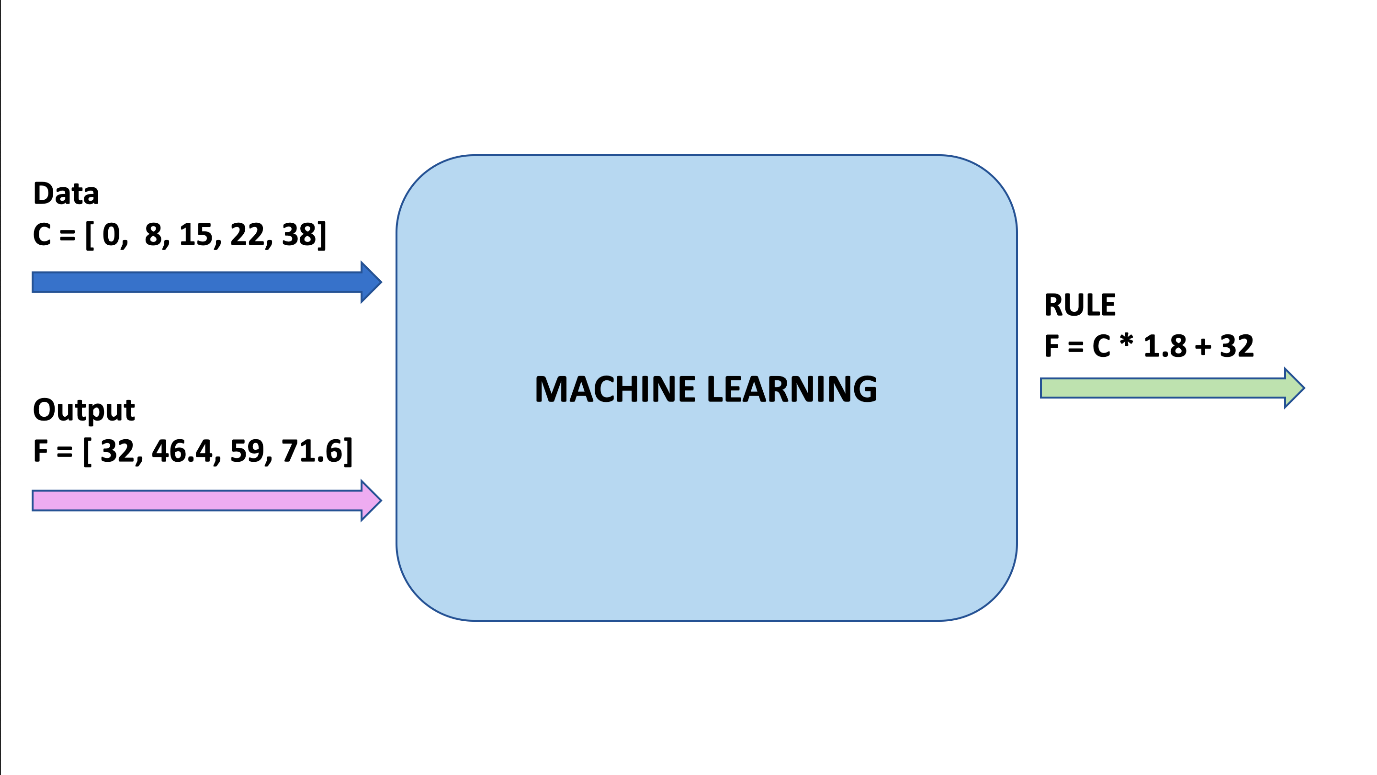

This was really impressive considering that we only needed a few lines code:

```python
l0 = tf.keras.layers.Dense(units=1, input_shape=[1]) 
model = tf.keras.Sequential([l0])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
model.predict([100.0])
```

This example is the general plan for of any machine learning program. You will use the same structure to create and train your neural network, and use it to make predictions. 

## The Training Process

The training process (`happening in model.fit(...)`) is really about tuning the internal variables of the networks to the best possible values, so that they can map the input to the output. This is achieved through an optimization process called Gradient Descent, which uses Numeric Analysis to find the best possible values to the internal variables of the model.

To do machine learning, you don't really need to understand these details. But for the curious: gradient descent iteratively adjusts parameters, nudging them in the correct direction a bit at a time until they reach the best values. In this case “best values” means that nudging them any more would make the model perform worse. The function that measures how good or bad the model is during each iteration is called the “loss function”, and the goal of each nudge is to “minimize the loss function.”

The training process starts with a forward pass, where the input data is fed to the neural network (see Fig.1). Then the model applies its internal math on the input and internal variables to predict an answer ("Model Predicts a Value" in Fig. 1).

In our example, the input was the degrees in Celsius, and the model predicted the corresponding degrees in Fahrenheit.

Figure 1. Forward Pass
![Figure 1. Forward Pass](attachment:Screenshot%202022-05-23%20at%2015-07-15%20tensorflow-l2f2%20png%20%28PNG%20Image,%202876%20%C3%97%201616%20pixels%29%20%E2%80%94%20Scaled%20(47%25).png)
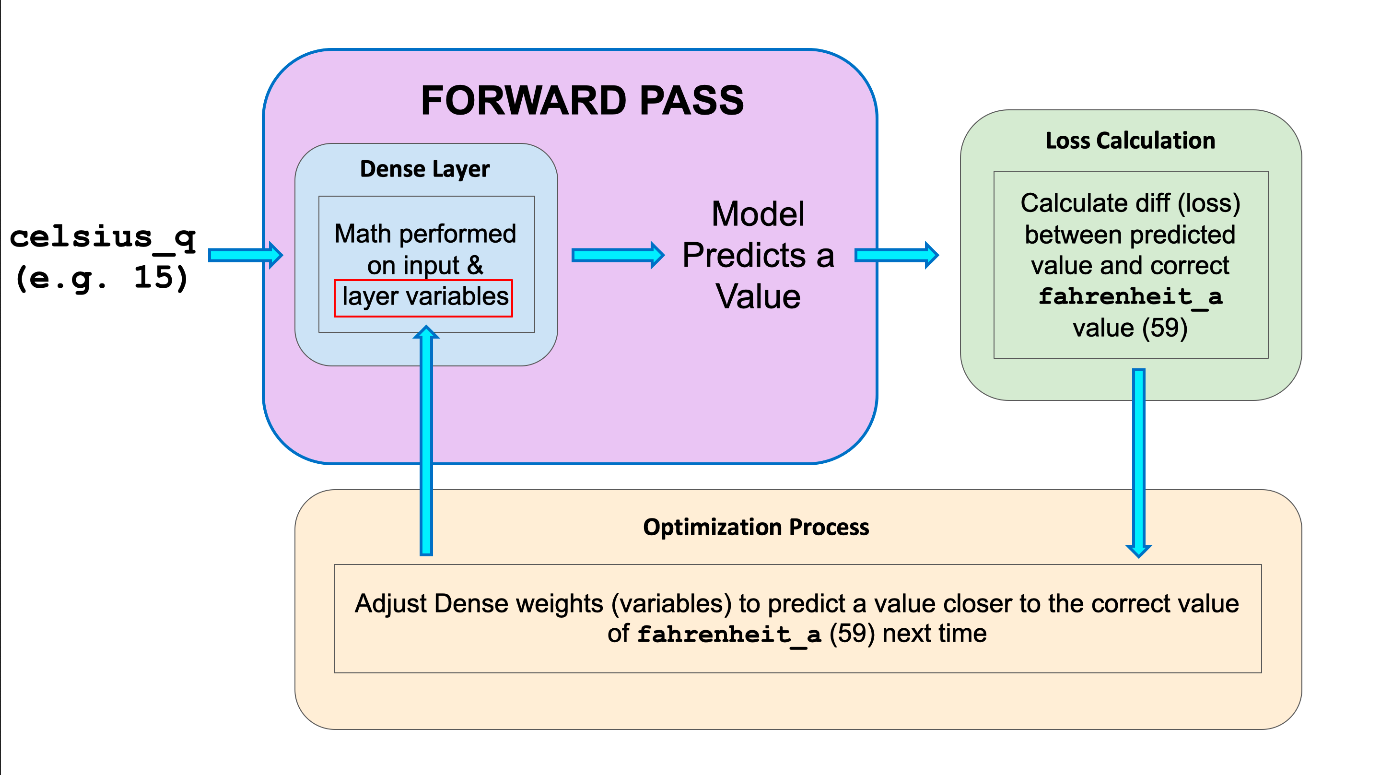

Once a value is predicted, the difference between that predicted value and the correct value is calculated. This difference is called the loss, and it's a measure of how well the model performed the mapping task. The value of the loss is calculated using a loss function, which we specified with the loss parameter when calling `model.compile()`

After the loss is calculated, the internal variables (weights and biases) of all the layers of the neural network are adjusted, so as to minimize this loss — that is, to make the output value closer to the correct value (see Fig. 2).


Figure 2. Backpropagation
![Screenshot%202022-05-23%20at%2015-12-56%20tensorflow-l2f3%20png%20%28PNG%20Image,%202876%20%C3%97%201618%20pixels%29%20%E2%80%94%20Scaled%20(47%25).png](attachment:Screenshot%202022-05-23%20at%2015-12-56%20tensorflow-l2f3%20png%20%28PNG%20Image,%202876%20%C3%97%201618%20pixels%29%20%E2%80%94%20Scaled%20(47%25).png)
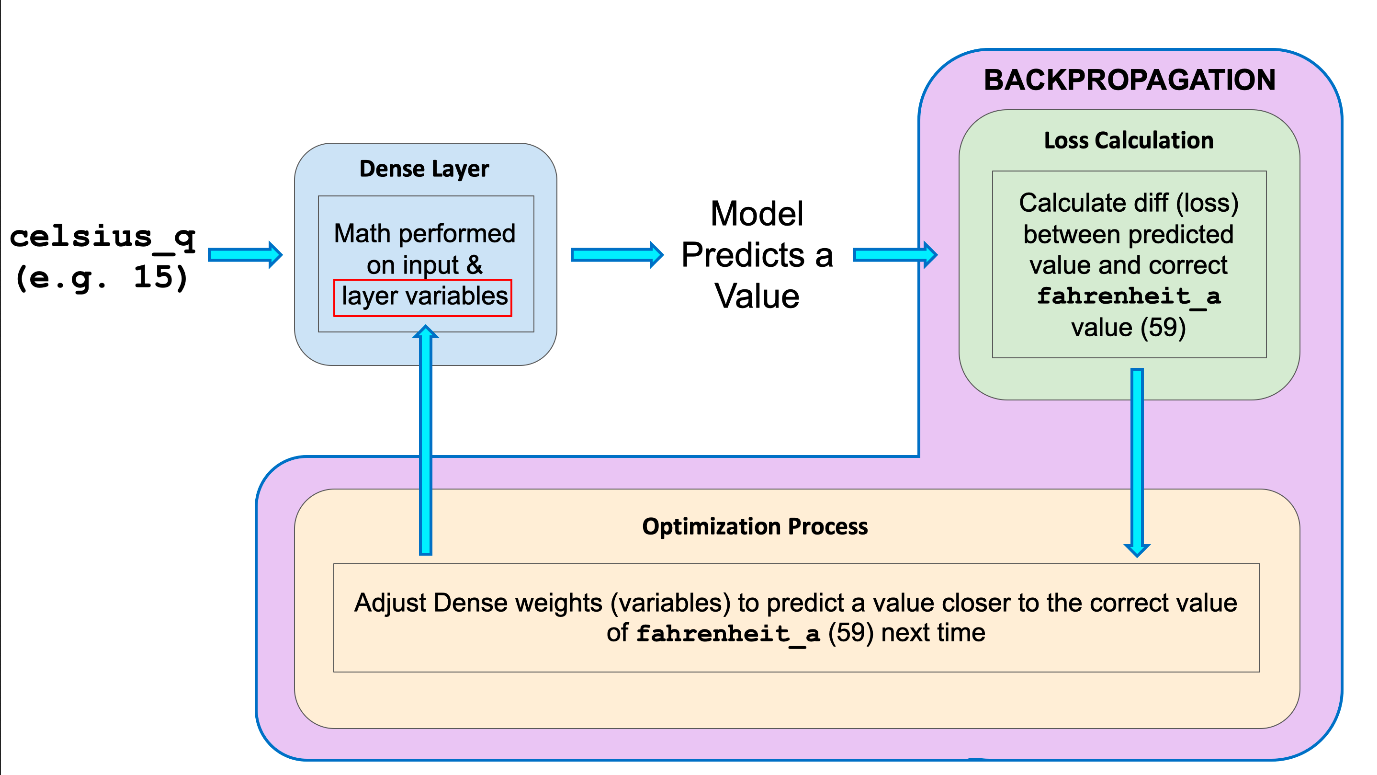

This optimization process is called Gradient Descent. The specific algorithm used to calculate the new value of each internal variable is specified by the optimizer parameter when calling model.compile(...). In this example we used the Adam optimizer.

It is not required for this course, but if you're interested in learning more details about how the training process works, you can look at the [lesson on reducing loss in Google’s machine learning crash course.](https://developers.google.com/machine-learning/crash-course/reducing-loss/video-lecture)

By now you should know what the following terms are


* Feature: The input(s) to our model*
    Examples: An input/output pair used for training
* Labels: The output of the model
* Layer: A collection of nodes connected together within a neural network.
* Model: The representation of your neural network
* Dense and Fully Connected (FC): Each node in one layer is connected to each node in the previous layer.
* Weights and biases: The internal variables of model
* Loss: The discrepancy between the desired output and the actual output
* MSE: Mean squared error, a type of loss function that counts a small number of large discrepancies as worse than a large number of small ones.
* Gradient Descent: An algorithm that changes the internal variables a bit at a time to gradually reduce the loss function.
* Optimizer: A specific implementation of the gradient descent algorithm. (There are many algorithms for this. In this course we will only use the “Adam” Optimizer, which stands for ADAptive with Momentum. It is considered the best-practice optimizer.)
* Learning rate: The “step size” for loss improvement during gradient descent.
* Batch: The set of examples used during training of the neural network
* Epoch: A full pass over the entire training dataset
* Forward pass: The computation of output values from input
*  Backward pass (backpropagation): The calculation of internal variable adjustments according to the optimizer algorithm, starting from the output layer and working back through each layer to the input.



# Summary

**In this lesson you learned some of the basic concepts behind Machine Learning and how Dense layers work. You trained your first machine learning model to convert Celsius to Fahrenheit. You also learned some of the key terms used in Machine Learning such as features, examples, and labels. You also learned the main lines of code that make up the skeleton of any machine learning algorithm. You saw that you only need a few lines of code to create, train, and make predictions with your neural network using TensorFlow and Keras.**


# CHAPTER 2:
#### The Rectified Linear Unit (ReLU)

In this lesson we talked about ReLU and how it gives our Dense layer more power. ReLU stands for Rectified Linear Unit and it is a mathematical function that looks like this:


![Screenshot%202022-05-24%20at%2009-29-42%20tensorflow-l3f1%20png%20%28PNG%20Image,%202434%20%C3%97%201330%20pixels%29%20%E2%80%94%20Scaled%20(58%25).png](attachment:Screenshot%202022-05-24%20at%2009-29-42%20tensorflow-l3f1%20png%20%28PNG%20Image,%202434%20%C3%97%201330%20pixels%29%20%E2%80%94%20Scaled%20(58%25).png)
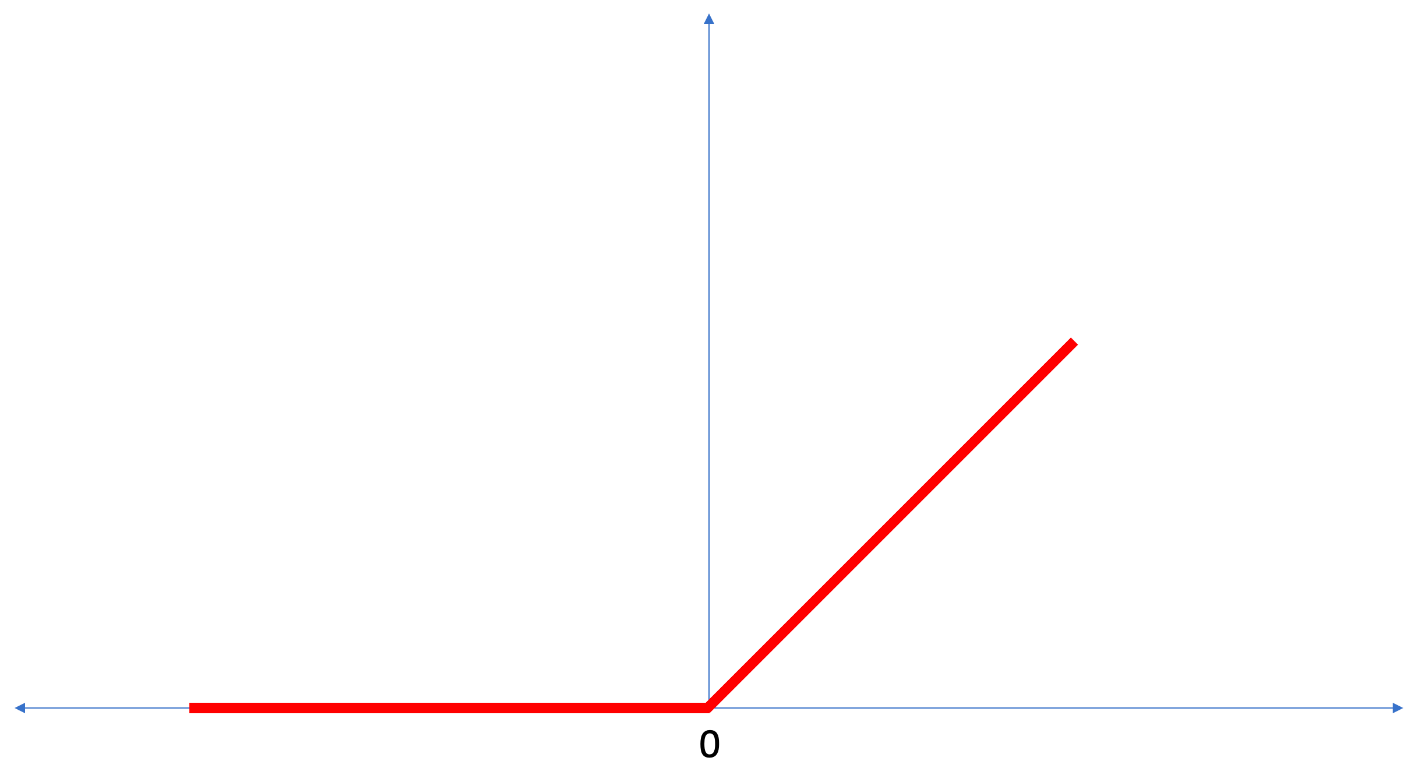

As we can see, the ReLU function gives an output of 0 if the input is negative or zero, and if input is positive, then the output will be equal to the input.

ReLU gives the network the ability to solve nonlinear problems.

Converting Celsius to Fahrenheit is a linear problem because `f = 1.8*c + 32` is the same form as the equation for a line, `y = m*x + b`. But most problems we want to solve are nonlinear. In these cases, adding ReLU to our Dense layers can help solve the problem.

ReLU is a type of activation function. There several of these functions (ReLU, Sigmoid, tanh, ELU), but ReLU is used most commonly and serves as a good default. To build and use models that include ReLU, you don’t have to understand its internals. But, if you want to know more, see this article on ReLU in Deep Learning.
[MORE INFO: >>ReLU in Deep Learning.](https://www.kaggle.com/code/dansbecker/rectified-linear-units-relu-in-deep-learning/notebook)

Let’s review some of the new terms that we will introduce in this lesson:

   * Flattening: The process of converting a 2d image into 1d vector
   * ReLU: An activation function that allows a model to solve nonlinear problems
   * Softmax: A function that provides probabilities for each possible output class
   * Classification: A machine learning model used for distinguishing among two or more output categories



[TensorFlow Datasets](https://medium.com/tensorflow/introducing-tensorflow-datasets-c7f01f7e19f3)provides a collection of datasets ready to use with TensorFlow.

Datasets are typically split into different subsets to be used at various stages of training and evaluation of the neural network. In this section we talked about:

   * Training Set: The data used for training the neural network.
   * Test set: The data used for testing the final performance of our neural network.

The test dataset was used to try the network on data it has never seen before. This enables us to see how the model generalizes beyond what it has seen during training, and that it has not simply memorized the training examples.

In the same way, it is common to use what is called a Validation dataset. This dataset is not used for training. Instead, it it used to test the model during training. This is done after some set number of training steps, and gives us an indication of how the training is progressing. For example, if the loss is being reduced during training, but accuracy deteriorates on the validation set, that is an indication that the model is memorizing the test set.

The validation set is used again when training is complete to measure the final accuracy of the model.

You can read more about all this in the Training and Test Sets lesson of Google’s Machine Learning Crash Course.[Google’s Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/training-and-test-sets/video-lecture)


## TASK2: Classifying Images of Clothing
We will now build and train a neural network to classify images of clothing, like sneakers and shirts.

It's okay if you don't understand everything. This is a fast-paced overview of a complete TensorFlow program, with explanations along the way. The goal is to get the general sense of a TensorFlow project, not to catch every detail.

This guide uses `tf.keras`, a high-level API to build and train models in TensorFlow.
## Install and import dependencies

We'll need [TensorFlow Datasets](https://www.tensorflow.org/datasets/), an API that simplifies downloading and accessing datasets, and provides several sample datasets to work with. We're also using a few helper libraries.

In [20]:
pip install -U tensorflow_datasets

Note: you may need to restart the kernel to use updated packages.Collecting tensorflow_datasets

  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21502 sha256=d8c000599a5023f6568fe278588acb2008d5b3dcf0db51066d359ea4ee264cc8
  Stored in directory: c:\users\isaac\appdata\local\pip\cache\wheels\e1\e8\83\ddea66100678d139b14bc87692ece57c6a2a937956d2532608
Successfully built promise


In [21]:
import tensorflow as tf
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

#### Import the Fashion MNIST dataset

This guide uses the Fashion MNIST dataset, which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 × 28 pixels), as seen here:
![Screenshot%202022-05-24%20at%2010-00-00%20fashion-mnist-sprite%20png%20%28PNG%20Image,%20840%20%C3%97%20840%20pixels%29%20%E2%80%94%20Scaled%20(92%25).png](attachment:Screenshot%202022-05-24%20at%2010-00-00%20fashion-mnist-sprite%20png%20%28PNG%20Image,%20840%20%C3%97%20840%20pixels%29%20%E2%80%94%20Scaled%20(92%25).png) Figure 1. Fashion-MNIST samples (by Zalando, MIT License).

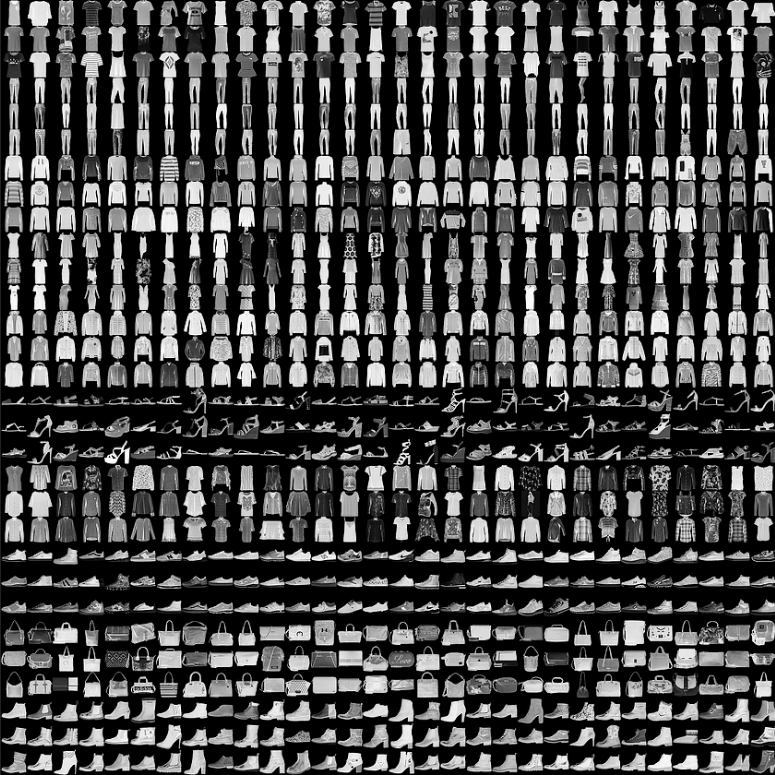

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc) in an identical format to the articles of clothing we'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow, using the Datasets API:

In [22]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dataset fashion_mnist downloaded and prepared to C:\Users\Isaac\tensorflow_datasets\fashion_mnist\3.0.1. Subsequent calls will reuse this data.


Loading the dataset returns metadata as well as a *training dataset* and *test dataset*.

* The model is trained using `train_dataset`.
* The model is tested against `test_dataset`.

The images are 28 $\times$ 28 arrays, with pixel values in the range `[0, 255]`. The *labels* are an array of integers, in the range `[0, 9]`. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [24]:
class_names = metadata.features['label'].names
print("Class names: {}".format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, and 10000 images in the test set

In [34]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


## Preprocess the data

The value of each pixel in the image data is an integer in the range `[0,255]`. For the model to work properly, these values need to be normalized to the range `[0,1]`. So here we create a normalization function, and then apply it to each image in the test and train datasets.

In [35]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

### Explore the processed data

Let's plot an image to see what it looks like.

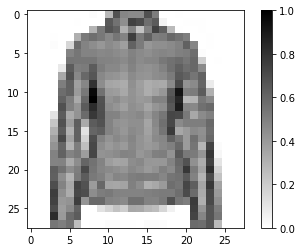

In [41]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

Display the first 25 images from the *training set* and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

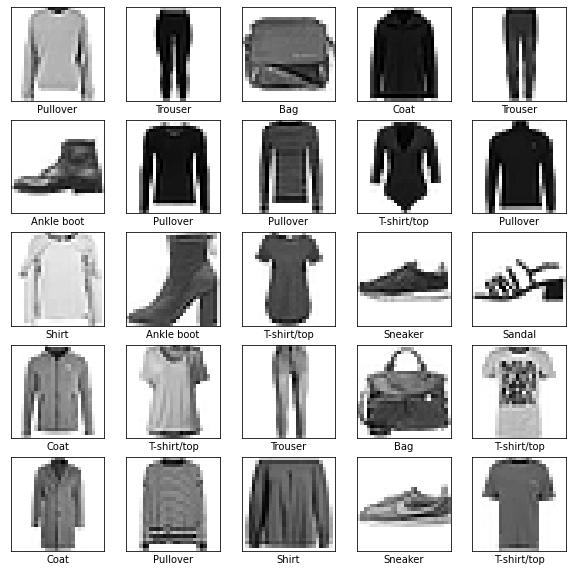

In [61]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1) #note we use 5*5 matrix because we want 25 images(if we want 50 images we can use 10*5)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Setup the layers

The basic building block of a neural network is the *layer*. A layer extracts a representation from the data fed into it. Hopefully, a series of connected layers results in a representation that is meaningful for the problem at hand.

Much of deep learning consists of chaining together simple layers. Most layers, like `tf.keras.layers.Dense`, have internal parameters which are adjusted ("learned") during training.

In [64]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

This network has three layers:

* **input** `tf.keras.layers.Flatten` — This layer transforms the images from a 2d-array of 28 $\times$ 28 pixels, to a 1d-array of 784 pixels (28\*28). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn, as it only reformats the data.

* **"hidden"** `tf.keras.layers.Dense`— A densely connected layer of 128 neurons. Each neuron (or node) takes input from all 784 nodes in the previous layer, weighting that input according to hidden parameters which will be learned during training, and outputs a single value to the next layer.

* **output**  `tf.keras.layers.Dense` — A 128-neuron, followed by 10-node *softmax* layer. Each node represents a class of clothing. As in the previous layer, the final layer takes input from the 128 nodes in the layer before it, and outputs a value in the range `[0, 1]`, representing the probability that the image belongs to that class. The sum of all 10 node values is 1.

> Note: Using `softmax` activation and `SparseCategoricalCrossentropy()` has issues and which are patched by the `tf.keras` model. A safer approach, in general, is to use a linear output (no activation function) with `SparseCategoricalCrossentropy(from_logits=True)`.


### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:


* *Loss function* — An algorithm for measuring how far the model's outputs are from the desired output. The goal of training is this measures loss.
* *Optimizer* —An algorithm for adjusting the inner parameters of the model in order to minimize loss.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [65]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

## Train the model

First, we define the iteration behavior for the train dataset:
1. Repeat forever by specifying `dataset.repeat()` (the `epochs` parameter described below limits how long we perform training).
2. The `dataset.shuffle(60000)` randomizes the order so our model cannot learn anything from the order of the examples.
3. And `dataset.batch(32)` tells `model.fit` to use batches of 32 images and labels when updating the model variables.

Training is performed by calling the `model.fit` method:
1. Feed the training data to the model using `train_dataset`.
2. The model learns to associate images and labels.
3. The `epochs=5` parameter limits training to 5 full iterations of the training dataset, so a total of 5 * 60000 = 300000 examples.

(Don't worry about `steps_per_epoch`, the requirement to have this flag will soon be removed.)

In [66]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [67]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 19s 4ms/step - loss: 0.4974 - accuracy: 0.8251
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3718 - accuracy: 0.8664
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3374 - accuracy: 0.8762
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3110 - accuracy: 0.8860
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2901 - accuracy: 0.8934


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.88 (or 88%) on the training data

## Evaluate accuracy

Next, compare how the model performs on the test dataset. Use all examples we have in the test dataset to assess accuracy.

In [68]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 4s 6ms/step - loss: 0.3634 - accuracy: 0.8690
Accuracy on test dataset: 0.8690000176429749


As it turns out, the accuracy on the test dataset is smaller than the accuracy on the training dataset. This is completely normal, since the model was trained on the `train_dataset`. When the model sees images it has never seen during training, (that is, from the `test_dataset`), we can expect performance to go down. 

## Make predictions and explore

With the model trained, we can use it to make predictions about some images.

In [70]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [71]:
predictions.shape


(32, 10)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [74]:
predictions[0]

array([3.2405864e-05, 1.9421381e-05, 2.1101987e-02, 8.8556664e-07,
       9.7104788e-01, 1.5934339e-09, 7.7670268e-03, 4.6212754e-09,
       3.0379992e-05, 7.1263355e-09], dtype=float32)

A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value:

In [73]:
np.argmax(predictions[0])

4

So the model is most confident that this image is a shirt, or `class_names[6]`. And we can check the test label to see this is correct:

In [75]:
test_labels[0]

4

We can graph this to look at the full set of 10 class predictions

In [76]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's look at the 0th image, predictions, and prediction array. 

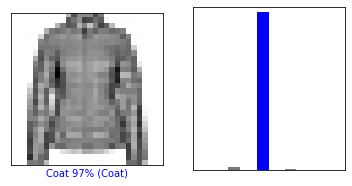

In [77]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

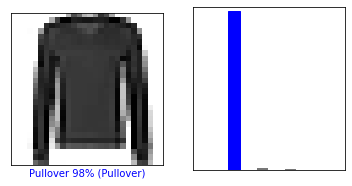

In [78]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident.

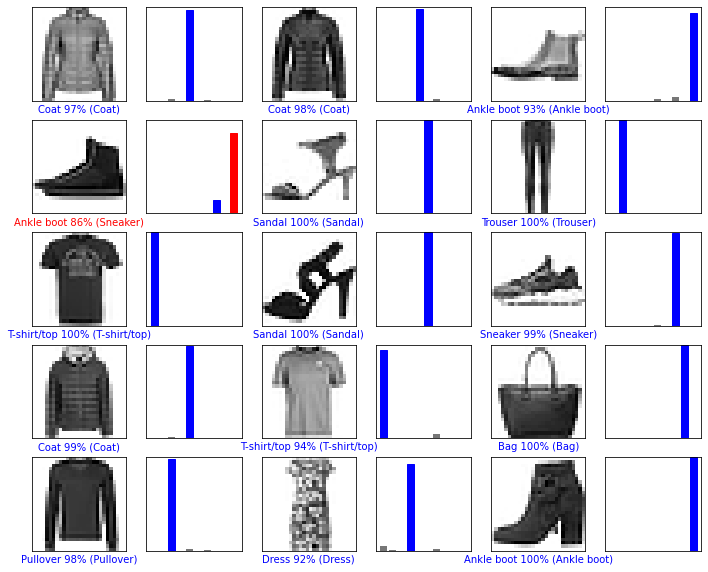

In [79]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)



Finally, use the trained model to make a prediction about a single image.


In [80]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

In [81]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


Now predict the image:

In [82]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.2405893e-05 1.9421361e-05 2.1101967e-02 8.8556584e-07 9.7104788e-01
  1.5934309e-09 7.7670198e-03 4.6212754e-09 3.0379992e-05 7.1263222e-09]]


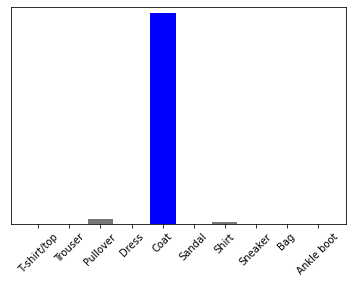

In [83]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` returns a list of lists, one for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [84]:
np.argmax(predictions_single[0])

4

And, as before, the model predicts a label of 6 (shirt)

# Summary

In this lesson we trained a neural network to classify images of articles of clothing. To do this we used the Fashion MNIST dataset, which contains 70,000 greyscale images of articles of clothing. We used 60,000 of them to train our network and 10,000 of them to test its performance. In order to feed these images into our neural network we had to flatten the 28 × 28 images into 1d vectors with 784 elements. Our network consisted of a fully connected layer with 128 units (neurons) and an output layer with 10 units, corresponding to the 10 output labels. These 10 outputs represent probabilities for each class. The softmax activation function calculated the probability distribution.

We also learned about the differences between regression and classification problems.

  * Regression: A model that outputs a single value. For example, an estimate of a house’s value.
  * Classification: A model that outputs a probability distribution across several categories. For example, in Fashion MNIST, the output was 10 probabilities, one for each of the different types of clothing. Remember, we use Softmax as the activation function in our last Dense layer to create this probability distribution.



![Screenshot%202022-05-24%20at%2012-03-02%20table-v3%20png%20%28PNG%20Image,%202224%20%C3%97%201120%20pixels%29%20%E2%80%94%20Scaled%20(69%25).png](attachment:Screenshot%202022-05-24%20at%2012-03-02%20table-v3%20png%20%28PNG%20Image,%202224%20%C3%97%201120%20pixels%29%20%E2%80%94%20Scaled%20(69%25).png)
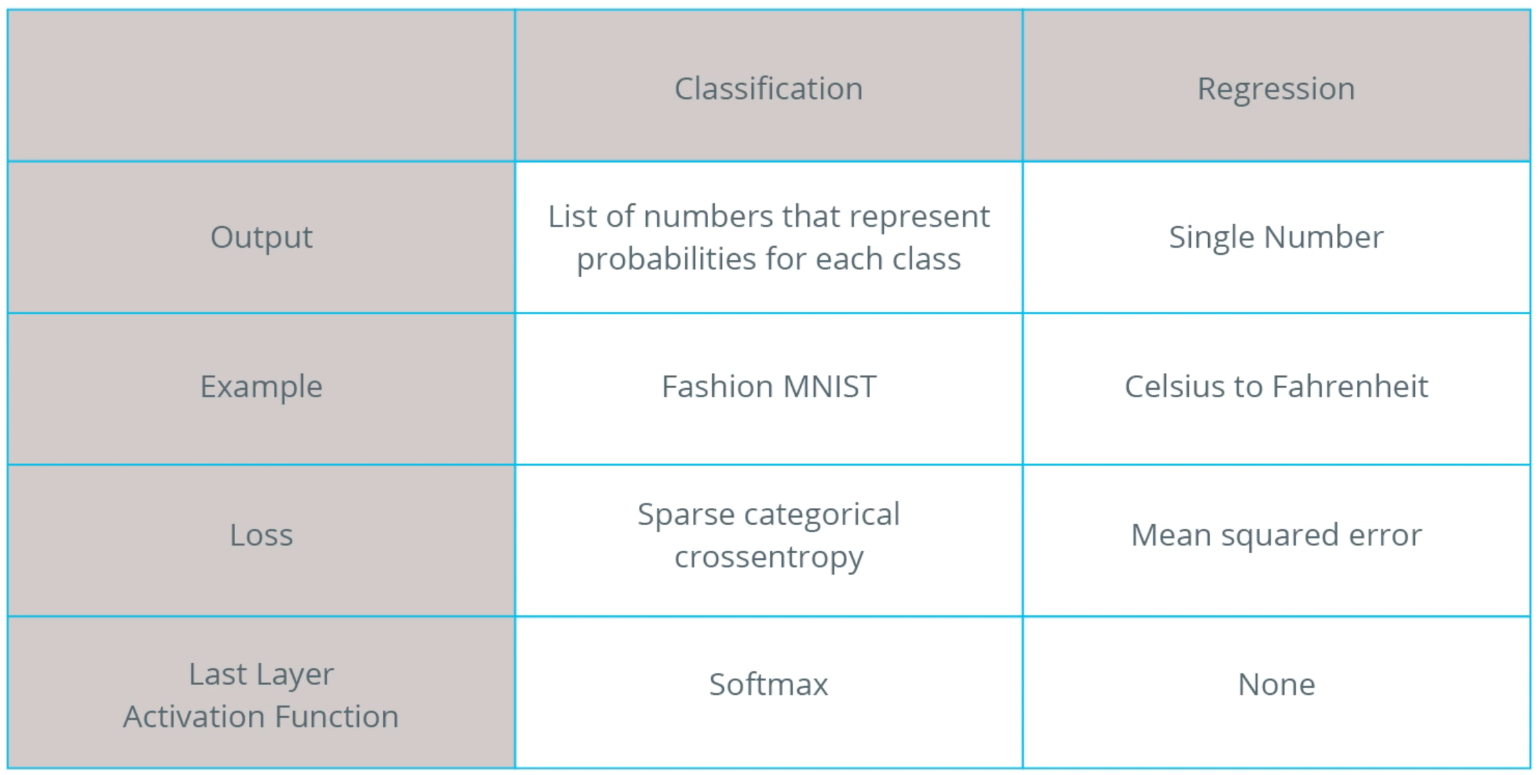

# Exercises

Experiment with different models and see how the accuracy results differ. In particular change the following parameters:
*   Set training epochs set to 1
*   Number of neurons in the Dense layer following the Flatten one. For example, go really low (e.g. 10) in ranges up to 512 and see how accuracy changes
*   Add additional Dense layers between the Flatten and the final `Dense(10)`, experiment with different units in these layers
*   Don't normalize the pixel values, and see the effect that has


Remember to enable GPU to make everything run faster (Runtime -> Change runtime type -> Hardware accelerator -> GPU).
Also, if you run into trouble, simply reset the entire environment and start from the beginning:
*   Edit -> Clear all outputs
*   Runtime -> Reset all runtimes

[Exercise 2: Follow this video](https://www.youtube.com/watch?v=-vHQub0NXI4)

[Exercise3: Video on more about machine learning and real life applications](https://www.youtube.com/watch?v=VwVg9jCtqaU)